In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255)
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
        
val_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [2]:
img_size = 500
img_size_y =496
batch_size = 8

train_image_generator = train_datagen.flow_from_directory('/media/monster/New Volume1/AerialImageDataset/train/train_frames/',
    batch_size = batch_size,
    target_size=(img_size,img_size), 
    color_mode='rgb', 
    classes=None,
    class_mode=None
) #NORMALLY 4/8/16/32)

train_mask_generator = train_datagen.flow_from_directory(
'/media/monster/New Volume1/AerialImageDataset/train/train_masks/',
    batch_size = batch_size,
    target_size=(img_size_y, img_size_y), 
    color_mode='grayscale', 
    classes=None,
    class_mode=None
) #NORMALLY 4/8/16/32)

val_image_generator = val_datagen.flow_from_directory(
'/media/monster/New Volume1/AerialImageDataset/train/val_frames/',
    batch_size = batch_size,
    target_size=(img_size, img_size), 
    color_mode='rgb', 
    classes=None,
    class_mode=None) #NORMALLY 4/8/16/32)


val_mask_generator = val_datagen.flow_from_directory(
'/media/monster/New Volume1/AerialImageDataset/train/val_masks/',
    batch_size = batch_size,
    target_size=(img_size_y, img_size_y), 
    color_mode='grayscale', 
    classes=None,
    class_mode=None
    ) #NORMALLY 4/8/16/32)

Found 125 images belonging to 1 classes.
Found 125 images belonging to 1 classes.
Found 37 images belonging to 1 classes.
Found 37 images belonging to 1 classes.


In [3]:
train_generator = zip(train_image_generator, train_mask_generator)

In [4]:
val_generator = zip(val_image_generator, val_mask_generator)

In [ ]:
#Custom data generator

# import cv2

# def data_gen(img_folder, mask_folder, batch_size):
#     c = 0
#     n = os.listdir(img_folder) #List of training images
#     random.shuffle(n)
#     while (True):
#         img = np.zeros((batch_size, 256, 256, 3)).astype('float')
#         mask = np.zeros((batch_size, 256, 256, 1)).astype('float')

#         for i in range(c, c+batch_size): #initially from 0 to 16, c = 0. 
#             train_img = cv2.imread(img_folder+'/'+n[i])/255.
#             train_img =  cv2.resize(train_img, (256, 256))# Read an image from folder and resize

#             img[i-c] = train_img #add to array - img[0], img[1], and so on.


#             train_mask = cv2.imread(mask_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE)/255.
#             train_mask = cv2.resize(train_mask, (256, 256))
#             train_mask = train_mask.reshape(256, 256, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

#             mask[i-c] = train_mask

#         c+=batch_size

#         if(c+batch_size>=len(os.listdir(img_folder))):
#             c=0
#             random.shuffle(n)
#                       # print "randomizing again"
#         yield img, mask




# train_frame_path = '/media/monster/New Volume1/AerialImageDataset/train/train_frames/train'
# train_mask_path = '/media/monster/New Volume1/AerialImageDataset/train/train_masks/train'

# val_frame_path = '/media/monster/New Volume1/AerialImageDataset/train/val_frames/val'
# val_mask_path = '/media/monster/New Volume1/AerialImageDataset/train/val_masks/val'

# # Train the model
# train_gen = data_gen(train_frame_path,train_mask_path, batch_size = 16)
# val_gen = data_gen(val_frame_path,val_mask_path, batch_size = 16)


In [5]:
import numpy as np 
import os
# import skimage.io as io
# import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (500,500,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
#     drop5 = Dropout(0.5)(conv5)

#     up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
#     merge6 = concatenate([drop4,up6], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)


    up6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool4))
#     merge6 = concatenate([drop4,conv4], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up6)

    up7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up6))
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up7)

    up8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up7))
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up8)

    up9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up8))
#     merge9 = concatenate([conv1,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up9)
    
#     conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(up9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [ ]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

smooth = 1e-9

# This is the competition metric implemented using Keras
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * (K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

# We'll construct a Keras Loss that incorporates the DICE score
def dice_loss(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1. - (2. * intersection + 1.) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.)


def bce_dice_loss(y_true, y_pred):
    return 0.5 * binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


In [ ]:
m = unet()

In [ ]:
m.summary()

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import random
# import model

NO_OF_TRAINING_IMAGES = len(os.listdir('/media/monster/New Volume1/AerialImageDataset/train/train_frames/train'))
NO_OF_VAL_IMAGES = len(os.listdir('/media/monster/New Volume1/AerialImageDataset/train/val_frames/val'))

# print(NO_OF_TRAINING_IMAGES)
# print(NO_OF_VAL_IMAGES)

NO_OF_EPOCHS = 10

BATCH_SIZE = batch_size

weights_path = '/media/monster/New Volume1/AerialImageDataset/train/mod1.h5'

m = unet()
# opt = Adam(lr=1E-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# m.compile(loss=bce_dice_loss,
#               optimizer=opt,
#               metrics=[dice_coef])

checkpoint = ModelCheckpoint(weights_path, monitor='accuracy', 
                             verbose=1, save_best_only=True, mode='max')

csv_logger = CSVLogger('./log.out', append=True, separator=';')

earlystopping = EarlyStopping(monitor = 'accuracy', verbose = 1,
                              min_delta = 0.01, patience = 3, mode = 'max')

callbacks_list = [checkpoint, csv_logger, earlystopping]

results = m.fit_generator(train_generator, epochs=NO_OF_EPOCHS, 
                          steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_generator, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)
# m.save('Model.h5')

W0527 22:59:57.578549 140182350407424 deprecation_wrapper.py:119] From /home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0527 22:59:57.606418 140182350407424 deprecation_wrapper.py:119] From /home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0527 22:59:57.610664 140182350407424 deprecation_wrapper.py:119] From /home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0527 22:59:57.632447 140182350407424 deprecation_wrapper.py:119] From /home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/backend/tensorflow_backen

Epoch 1/10
15/15 [==============================] - 75s 5s/step - loss: 0.5254 - acc: 0.7941 - val_loss: 0.4803 - val_acc: 0.8054
Epoch 2/10


/home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/home/monster/.conda/envs/production_ml_env/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


15/15 [==============================] - 71s 5s/step - loss: 0.4012 - acc: 0.8446 - val_loss: 0.4925 - val_acc: 0.7757
Epoch 3/10
15/15 [==============================] - 71s 5s/step - loss: 0.4375 - acc: 0.8259 - val_loss: 0.4198 - val_acc: 0.8456
Epoch 4/10
15/15 [==============================] - 71s 5s/step - loss: 0.3990 - acc: 0.8432 - val_loss: 0.5222 - val_acc: 0.7521
Epoch 5/10
15/15 [==============================] - 71s 5s/step - loss: 0.4078 - acc: 0.8365 - val_loss: 0.4545 - val_acc: 0.8111
Epoch 6/10
15/15 [==============================] - 71s 5s/step - loss: 0.4320 - acc: 0.8275 - val_loss: 0.4605 - val_acc: 0.8037
Epoch 7/10
15/15 [==============================] - 71s 5s/step - loss: 0.3998 - acc: 0.8431 - val_loss: 0.4900 - val_acc: 0.7807
Epoch 8/10
15/15 [==============================] - 70s 5s/step - loss: 0.4376 - acc: 0.8202 - val_loss: 0.4608 - val_acc: 0.8116
Epoch 9/10
15/15 [==============================] - 72s 5s/step - loss: 0.4096 - acc: 0.8378 - val_lo

In [ ]:
m.summary()

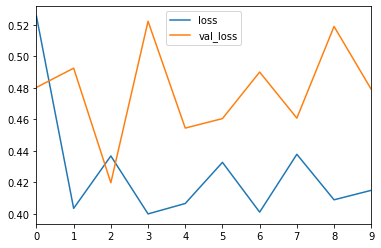

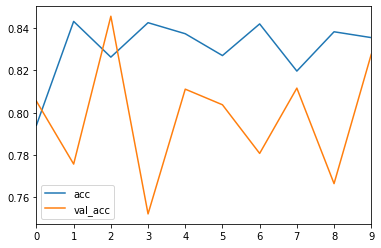

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(results.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()
plt.show()

In [ ]:
# test = data_gen('/media/monster/New Volume1/AerialImageDataset/train/test_frames','/media/monster/New Volume1/AerialImageDataset/train/test_masks', batch_size = 1)

In [ ]:
# pred = m.predict_generator(test,18)

In [ ]:
# from PIL import Image

# img = Image.fromarray(pred[0], 'RGB')
# # img.save('my.png')
# img.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_image_generator = test_datagen.flow_from_directory('/media/monster/New Volume1/AerialImageDataset/train/test_frames',
    batch_size = 1,
    target_size=(img_size,img_size), 
    color_mode='rgb', 
    classes=None,
    class_mode=None
) #NORMALLY 4/8/16/32)

Found 18 images belonging to 1 classes.


In [ ]:
test_img_path = '/media/monster/New Volume1/AerialImageDataset/train/test_frames/vienna3.jpg'

In [ ]:
# #load model

# #load model
# from keras.models import load_model
# # model = load_model('vgg16_1.h5')
# m1 = load_model('/media/monster/New Volume1/AerialImageDataset/train/mod1.h5')


In [12]:
test_image_generator.reset()
predict=m.predict_generator(test_image_generator, steps = len(test_image_generator.filenames))

In [13]:
predict.shape

(18, 496, 496, 1)

In [14]:
predict[0].shape

(496, 496, 1)

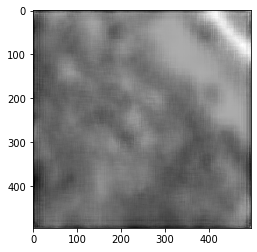

In [17]:
plt.imshow(predict[0][:,:,0], cmap=plt.cm.gray)   

In [18]:
import cv2

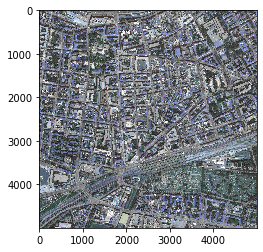

In [19]:
img = cv2.imread(test_image_generator.filepaths[0])
plt.imshow(img, cmap=plt.cm.gray)   

In [ ]:
test_image_generator.filepaths[0]